In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer #for converting text data into numerical data
from sklearn.model_selection import train_test_split #to split the data
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

## Loading The Dataset

In [2]:

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Load the dataset
dataset = pd.read_csv("mail_data.csv")  # or use the exact name of your CSV file

# Step 2: Check the actual column names
print(dataset.columns)


Index(['Category', 'Message'], dtype='object')


In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# ✅ Step 1: Load the dataset
dataset = pd.read_csv('mail_data.csv')  # make sure the file is in your working directory

# ✅ Step 2: Replace NaNs with empty strings
dataset = dataset.where(pd.notnull(dataset), '')

# ✅ Step 3: Print columns to confirm structure (optional)
print(dataset.columns)

# ✅ Step 4: Use the correct column ('Message') for text vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['Message'])  # Correct column


Index(['Category', 'Message'], dtype='object')


In [4]:
dataset.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
print(dataset['Category'].value_counts())


Category
ham     4825
spam     747
Name: count, dtype: int64


## Data Preprocessing

In [5]:
import pandas as pd

dataset = pd.read_csv("mail_data.csv", encoding='latin1')
dataset = dataset[['Category', 'Message']]  # Keep only necessary columns
dataset = dataset.dropna()

In [6]:
# Encoding the labels
dataset['label'] = dataset['Category'].map({'ham': 0, 'spam': 1})


In [16]:
model.fit(X_train, Y_train)
print(dataset['label'].value_counts())
model = LogisticRegression(class_weight='balanced')


label
0    4825
1     747
Name: count, dtype: int64


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# Step 3: Replace NaN values
dataset = dataset.where(pd.notnull(dataset), '')

# Step 4: Initialize and fit the vectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['Message'])  # Use the correct column name here


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X = vectorizer.fit_transform(dataset['Message'])


In [50]:
# Encoding labels
dataset['label'] = dataset['Category'].map({'ham': 0, 'spam': 1})

# Feature extraction
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['Message'])
Y = dataset['label']

# Train once
vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X = vectorizer.fit_transform(dataset['Message'])
model.fit(X_train, Y_train)

# Then use the SAME vectorizer in prediction:
def predictMessage(message):
    message_vector = vectorizer.transform([message])
    prediction = model.predict(message_vector)
    return 'spam' if prediction[0] == 1 else 'ham'



In [52]:
# Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

# Model training
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')  # Handles class imbalance
model.fit(X_train, Y_train)




## Feature Extraction

In [12]:
from sklearn.model_selection import train_test_split
# Define features and labels
y = dataset['Category']

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=3)



In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X = vectorizer.fit_transform(dataset['Message'])  # assuming this is your text column


## Train The Model

In [1]:
# Model training
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')  # Handles class imbalance
model.fit(X_train, Y_train)

import joblib

# Train model
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(['Message']) 
model = LogisticRegression()
model.fit(X, Category)

# Save both model and vectorizer
joblib.dump(model, 'spam_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')



NameError: name 'X_train' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)



## Model Evaluation

In [19]:
from sklearn.metrics import accuracy_score
YPred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, YPred)
print(accuracy)

0.9829596412556054


In [20]:
Y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report

Y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))


Accuracy: 0.9829596412556054
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



C:\Users\ilmar\AppData\Local\Temp\ipykernel_51040\351968301.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2')


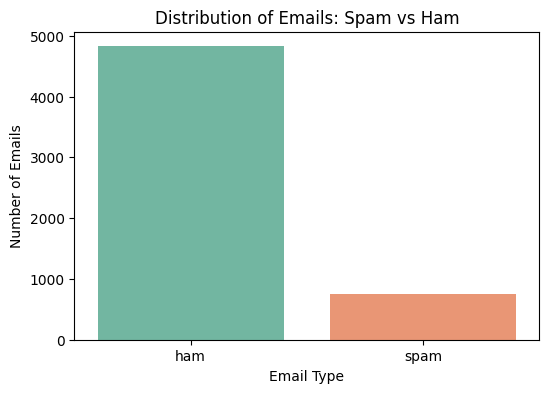

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count spam vs. ham
label_counts = dataset['Category'].value_counts()

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2')
plt.title('Distribution of Emails: Spam vs Ham')
plt.xlabel('Email Type')
plt.ylabel('Number of Emails')
plt.show()




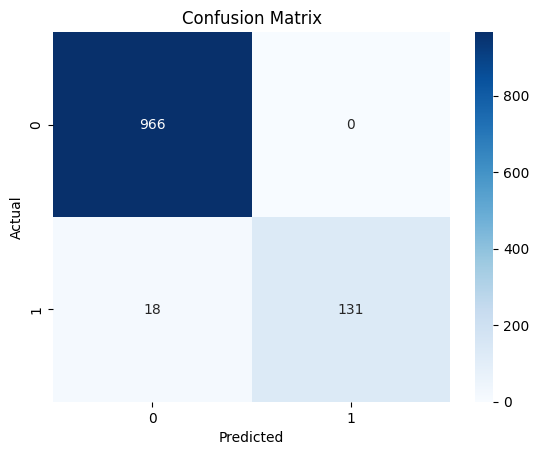

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [22]:
# Assuming you trained a model named 'model'
Y_pred = model.predict(X_test)  # Use your actual model variable here


In [23]:
# Convert string labels to numeric
Y_test_bin = Y_test.map({'ham': 0, 'spam': 1})


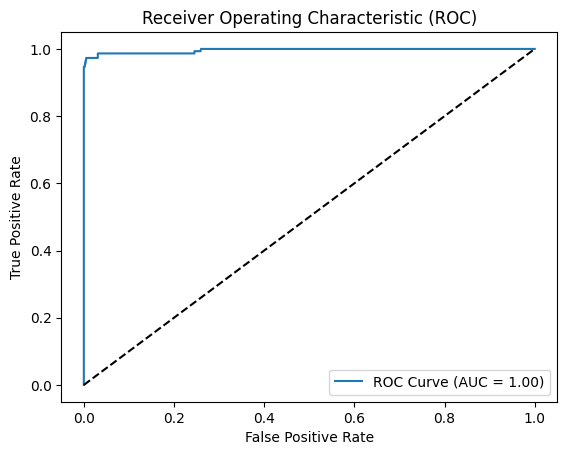

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert string labels to binary (0 and 1)
Y_test_bin = Y_test.map({'ham': 0, 'spam': 1})

# Get predicted probabilities for class 1 (spam)
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(Y_test_bin, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


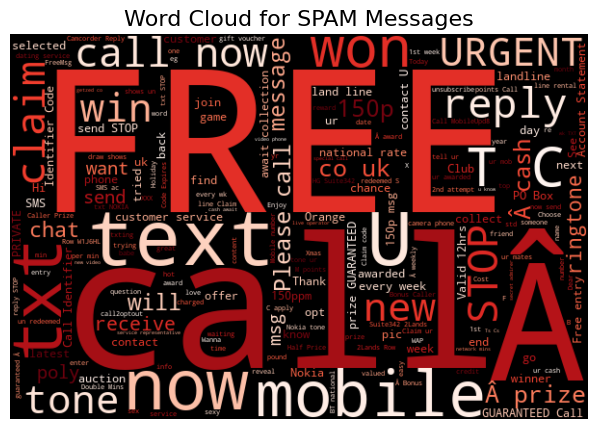

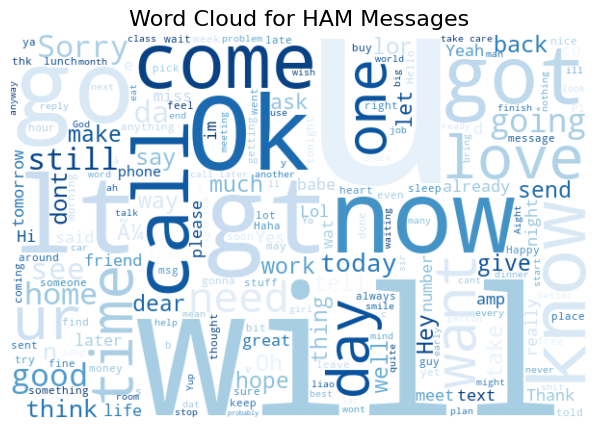

In [25]:
# Install if not already installed
# pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate spam and ham messages
spam_messages = dataset[dataset['label'] == 1]['Message']
ham_messages = dataset[dataset['label'] == 0]['Message']

# Combine all spam messages into one string
spam_text = " ".join(spam_messages)
ham_text = " ".join(ham_messages)

# Create word cloud for spam
spam_wc = WordCloud(width=600, height=400, background_color='black', colormap='Reds').generate(spam_text)

# Create word cloud for ham
ham_wc = WordCloud(width=600, height=400, background_color='white', colormap='Blues').generate(ham_text)

# Plot spam word cloud
plt.figure(figsize=(10, 5))
plt.title("Word Cloud for SPAM Messages", fontsize=16)
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Plot ham word cloud
plt.figure(figsize=(10, 5))
plt.title("Word Cloud for HAM Messages", fontsize=16)
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


## Spam Detection Prediction

In [55]:
#  Predict function
def predictMessage(message):
    messageVector = vectorizer.transform([message])  # Use same vectorizer
    prediction = model.predict(messageVector)
    return 'spam' if prediction[0] == 1 else 'ham'

In [ ]:
# function to predict if a email is spam or not
def predictMessage(message):
    
    messageVector = vectorizer.transform([message])
    
    prediction = model.predict(messageVector)
    
    return 'spam' if prediction[0] == 1 else 'ham'


# get user input to predict
userMessage = input('Enter text to predict')
prediction = predictMessage(userMessage)
print(f'The message is:{prediction}')

In [69]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, Y_train)


MultinomialNB()

In [70]:
Y_pred_nb = nb_model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report

print("Naive Bayes Accuracy:", accuracy_score(Y_test, Y_pred_nb))
print("Classification Report:\n", classification_report(Y_test, Y_pred_nb))


Naive Bayes Accuracy: 0.9748878923766816
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



In [1]:
def predictMessageNB(message):
    message_vector = vectorizer.transform([message])
    prediction = nb_model.predict(message_vector)
    return 'spam' if prediction[0] == 1 else 'ham'


In [ ]:
# get user input to predict
userMessage = input('Enter text to predict')
prediction = predictMessage(userMessage)
print(f'The message is:{prediction}')

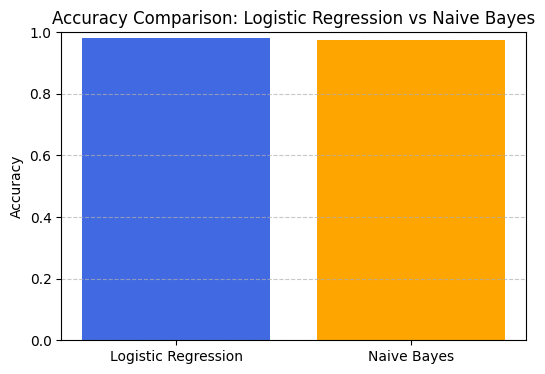

In [74]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Train Logistic Regression
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train, Y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(Y_test, lr_pred)

# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, Y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(Y_test, nb_pred)

# Plotting comparison
models = ['Logistic Regression', 'Naive Bayes']
accuracies = [lr_accuracy, nb_accuracy]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['royalblue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Logistic Regression vs Naive Bayes')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [75]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')  # You can also try 'rbf' or 'poly' kernels
svm_model.fit(X_train, Y_train)


SVC(kernel='linear')

In [78]:
svm_pred = svm_model.predict(X_test)


In [79]:
from sklearn.metrics import accuracy_score, classification_report

svm_accuracy = accuracy_score(Y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", classification_report(Y_test, svm_pred))


SVM Accuracy: 0.9847533632286996
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.99      0.98      0.98      1115



In [2]:
def predictMessageNB(message):
    message_vector = vectorizer.transform([message])
    prediction = svm_model.predict(message_vector)
    return 'spam' if prediction[0] == 1 else 'ham'


In [ ]:
# get user input to predict
userMessage = input('Enter text to predict')
prediction = predictMessage(userMessage)
print(f'The message is:{prediction}')

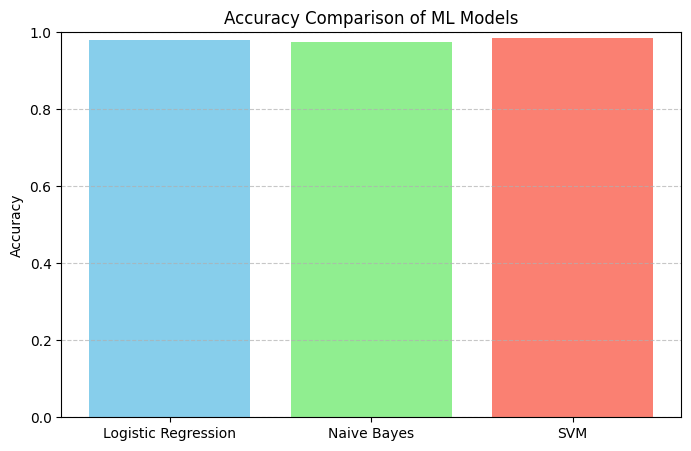

In [83]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Train Logistic Regression
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train, Y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(Y_test, lr_pred)

# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, Y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(Y_test, nb_pred)

# Train SVM
svm_model = LinearSVC()
svm_model.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(Y_test, svm_pred)

# Plotting
models = ['Logistic Regression', 'Naive Bayes', 'SVM']
accuracies = [lr_accuracy, nb_accuracy, svm_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of ML Models')
plt.ylim(0, 1)  # accuracy range from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
